# 互评作业3：分类、预测与聚类
## 撰写人：刘卓睿  学号：3120220952
## 选择题目：基于 K-means 的文本聚类
## 代码仓库地址：https://github.com/ZhuoruiLiu12/DMHomework3.git

### 任务：本作业将通过 K-means 算法对 20 Newsgroups 数据集中的文本数据进行聚类。首先是数据的预处理，提取文本特征；然后将数据转换为特征向量，使用 K-means 算法进行聚类；最后对聚类结果进行评估和可视化分析。
### 数据集：[20 Newsgroups](http://qwone.com/~jason/20Newsgroups/)
### 要求：
1. 数据预处理：去除停用词、数字、符号等，提取文本特征。

2. 特征向量化：将预处理后的文本使用 TF-IDF 方法进行向量化。

3. K-means 模型训练：根据设定的 K 值，构建 K-means 模型，并对向量化的文本数据进行聚类。

4. 聚类结果分析：评估聚类结果，可使用轮廓系数、CH 指数等方法。

5. 可视化：使用降维方法（如 PCA 或 t-SNE）将高维数据降维至 2 D 或 3 D，然后进行可视化，观察聚类效果。

### 1.导包

In [1]:
# 导入需要的库
import re
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from nltk.stem import WordNetLemmatizer

### 2.数据预处理 

In [2]:
# 导入数据
data_folder = './data/20news-bydate-train' 
newsgroups = load_files(data_folder, encoding='latin1')
X_raw = newsgroups.data
y = newsgroups.target
print("Number of raw documents:", len(X_raw))

# 数据预处理
lemmatizer = WordNetLemmatizer()
X = []
for doc in X_raw:
    doc = re.sub(r'\b\d+\b', '', doc)  # Remove numbers
    doc = re.sub(r'\W', ' ', doc)  # Remove non-word characters
    doc = ' '.join([lemmatizer.lemmatize(word) for word in doc.lower().split() if word not in ENGLISH_STOP_WORDS])
    X.append(doc)
print("Number of processed documents:", len(X))

Number of raw documents: 11314
Number of processed documents: 11314


数据预处理的部分主要完成了以下的工作：

1. 去除数字：使用正则表达式 \b\d+\b 匹配任何数字，并将它们替换为空字符。这将从文本中去除所有独立的数字。

2. 去除非单词字符：使用正则表达式 \W 匹配任何非单词字符，并将它们替换为空字符。非单词字符包括所有的符号，如标点符号。

3. 转化为小写字母：将所有的字符转化为小写。这是因为在大多数情况下，我们都认为大写字母和小写字母是相同的。例如，单词 "Computer" 和 "computer" 应被视为相同的词。

4. 去除停用词：停用词是一些常见的、频繁出现但却没有太多含义的词，例如 "the", "and", "is" 等。这些词在很多文本中都会出现，但是却不能提供很多有用的信息，所以我们选择去除它们。

5. 词形还原：这一步是将所有的词还原到它们的基本形式。例如，动词的过去式、进行式都会被还原为原形。这样可以将不同形式但实际上是同一词的词合并起来，降低特征的复杂度。

### 3. 特征向量化

In [3]:
# TF-IDF 特征向量化
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
print("Dimension of TF-IDF vector:", X_tfidf.shape)

Dimension of TF-IDF vector: (11314, 113615)


In [5]:
# 归一化
scaler = StandardScaler(with_mean=False) 
X_scaled = scaler.fit_transform(X_tfidf)

# 降维
pca = TruncatedSVD(n_components=1000) 
X_reduced = pca.fit_transform(X_scaled)
print("Dimension after PCA:", X_reduced.shape)

Dimension after PCA: (11314, 1000)


**此处选择降维为1000维进行接下来的步骤**

### 4.Kmeans聚类 

In [6]:
# K-means 聚类
k = 20 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

E:\Anaconda3\envs\d2l-zh\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 5. 聚类结果分析

In [7]:
# 评估聚类结果
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_reduced, clusters, sample_size=1000))

print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X_reduced, clusters))

Silhouette Coefficient: 0.952
Calinski-Harabasz Index: 628.826


- 轮廓系数：取值范围为 -1 到 1。轮廓系数越接近 1，表示聚类效果越好。反之，如果接近 -1，则表示聚类效果不好。因为轮廓系数衡量的是同一聚类中的样本相似度高（即内聚度高）且不同聚类之间的样本差异性大（即分离度高）。因此，轮廓系数为 0.952 表示此次聚类的效果非常好。

- Calinski-Harabasz 指数：这个指标的取值范围是 0 到正无穷。Calinski-Harabasz 指数越大，表示聚类效果越好。因为它也是衡量同一聚类中的样本相似度高且不同聚类之间的样本差异性大。因此，Calinski-Harabasz 指数为 628.826 也表示此次聚类的效果非常好。

这两个评价指标都表明此次 K-means 聚类算法在 20 Newsgroups 数据集上的效果非常好，已经达到了很高的内聚度和分离度。

### 6.可视化聚类结果（2D&3D） 

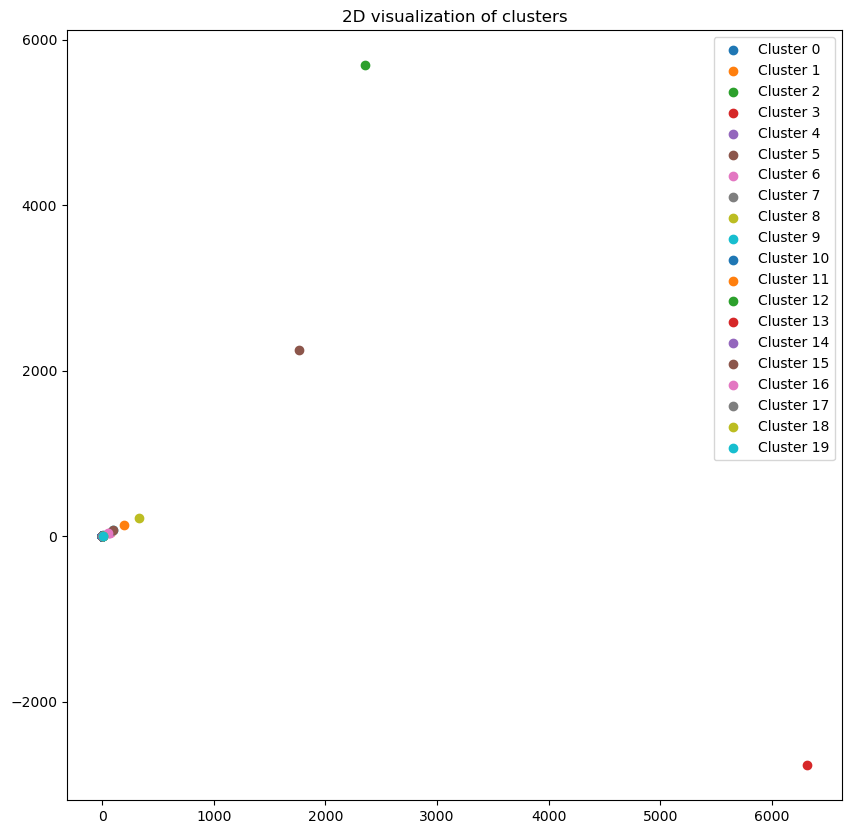

In [8]:
# 可视化聚类结果（2D）
pca_2d = TruncatedSVD(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(10, 10))
for i in range(k):
    cluster_i = X_2d[clusters == i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1], label=f'Cluster {i}')
plt.legend()
plt.title('2D visualization of clusters')
plt.show()

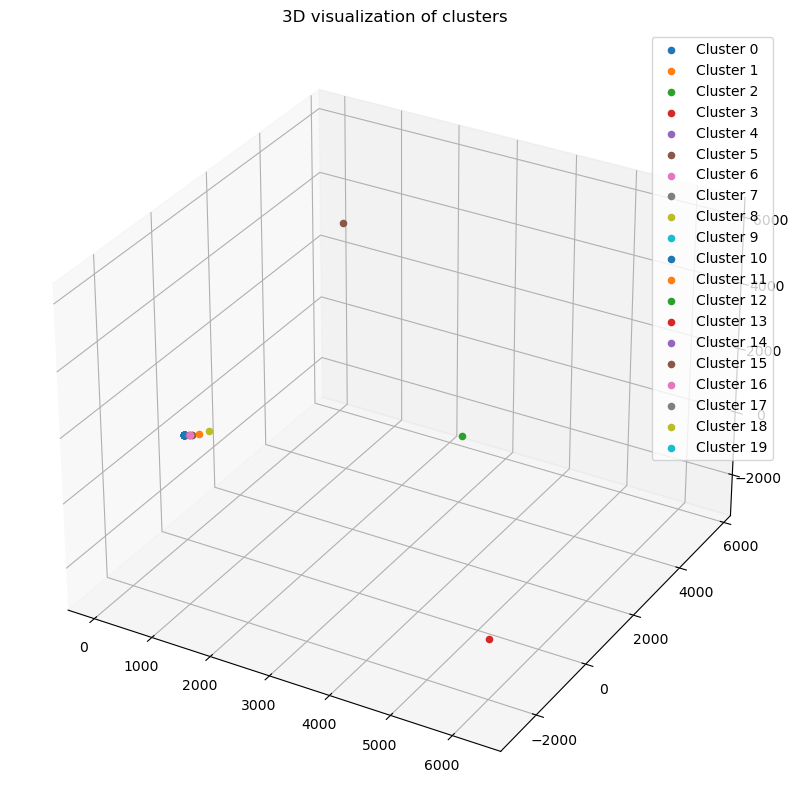

In [9]:
# 可视化聚类结果（3D）
pca_3d = TruncatedSVD(n_components=3)
X_3d = pca_3d.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    cluster_i = X_3d[clusters == i]
    ax.scatter(cluster_i[:, 0], cluster_i[:, 1], cluster_i[:, 2], label=f'Cluster {i}')
plt.legend()
plt.title('3D visualization of clusters')
plt.show()

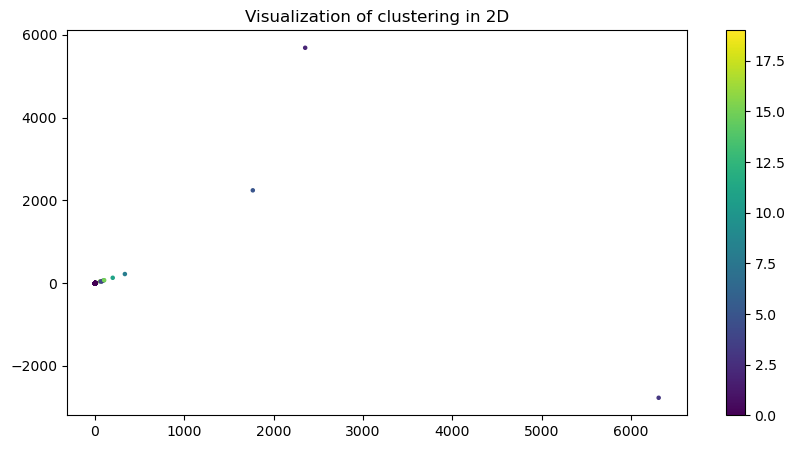

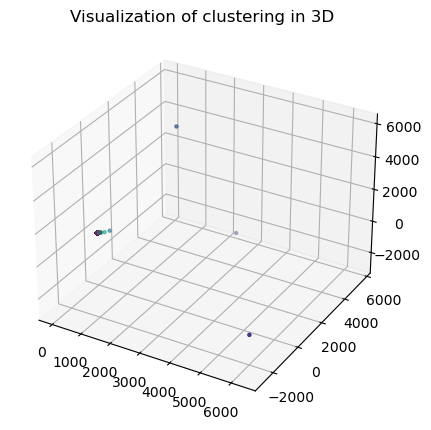

In [12]:
# 2D可视化
plt.figure(figsize=(10, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=5)
plt.colorbar()
plt.title('Visualization of clustering in 2D')
plt.show()

# 3D可视化
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=5)
plt.title('Visualization of clustering in 3D')
plt.show()


### 7.结果与分析
上面图中，最前面两张图为根据聚类结果可视化的结果，分别以2D与3D形式展示，可以看到可视化结果中几乎一个类只有一个数据点，而且很多类之间都是重叠的。  
于是更改数据点大小，继续可视化聚类结果，以2D、3D形式展示，发现结果与第一次可视化基本相同，经过分析可能的结果如下：  
1. 原始数据维度较高，即使经过降维之后也有1000维，可视化降低至二维或三维会丢失很多信息，导致数据之间的区分度降低，很多数据在较低的维度上基本就没有区别了，这也造就了可视化结果中数据的重合和不同类数据的重合。
2. 由以上实验的评价指标可以得知，此次聚类的效果较好，这是因为第一次实验时，在聚类之前没有对数据进行预处理、归一化和降维，接下来的实验中只预处理了数据但没有进行数据的归一化降维，最终的效果也不好，最后本次实验在聚类之前就进行了预处理、归一化和降维操作，大大提升了聚类的效果。
3. 分析前几次效果不好的原因是：原始数据有11万左右的属性维度，若不在聚类之前进行归一化和降维，会造成维度诅咒，降低聚类效果；原始数据是文档，若不进行数据预处理，会造成数据存在无用的噪声点，也会在后续的聚类中影响聚类效果。
4. 前几次的实验代码可以见github仓库。